In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import preprocessing.GSP as GSP
import random

plt.rcParams['figure.figsize'] = (15.0, 10.0)

In [6]:
file_location = "../data/Raman_Mouse/raw_npy/"
filenames = np.load(f"{file_location}FileNames.npy")
data = []
for f in filenames:
    data.append(np.load(f"{file_location}{f}"))


In [8]:
# assume linear increase in wavelength 
wavelength = np.load(f"{file_location}{filenames[0].split('.')[0]}_wavelength.npy")
shape = data[0].shape

raman_data = []
photo_data = []
for x in data:
    tmp = copy.copy(x.reshape(-1, x.shape[-1]))
#     tmp1 = GSP.smoothing(tmp, smooth=5, transition=10, spike_width=15)
    tmp1, tmp2 = GSP.split_Raman_af(GSP.smoothing(tmp, smooth=5, transition=10, spike_width=15), wavelength, 7)
    raman_data.append(tmp1)
    photo_data.append(tmp2)

In [9]:
# #Smoothing
# x=random.randint(0,24)
# y=random.randint(0,149)
# print(x,y)

# plt.plot(wavelength, raman_data[0][x+y*25])
# plt.plot(wavelength, data[0][y,x], alpha=0.3)
# plt.show()

3 77


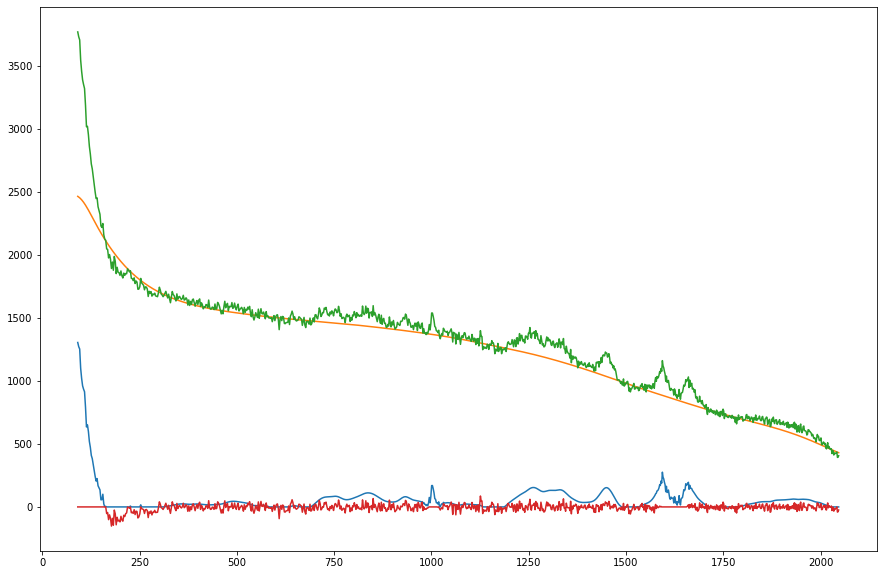

In [10]:
#splitting
x=random.randint(0,24)
y=random.randint(0,149)
print(x,y)

plt.plot(wavelength, raman_data[0][x+y*25])
plt.plot(wavelength, photo_data[0][x+y*25])
plt.plot(wavelength, data[0][y,x])
plt.plot(wavelength, data[0][y,x]-photo_data[0][x+y*25]-raman_data[0][x+y*25])
plt.show()

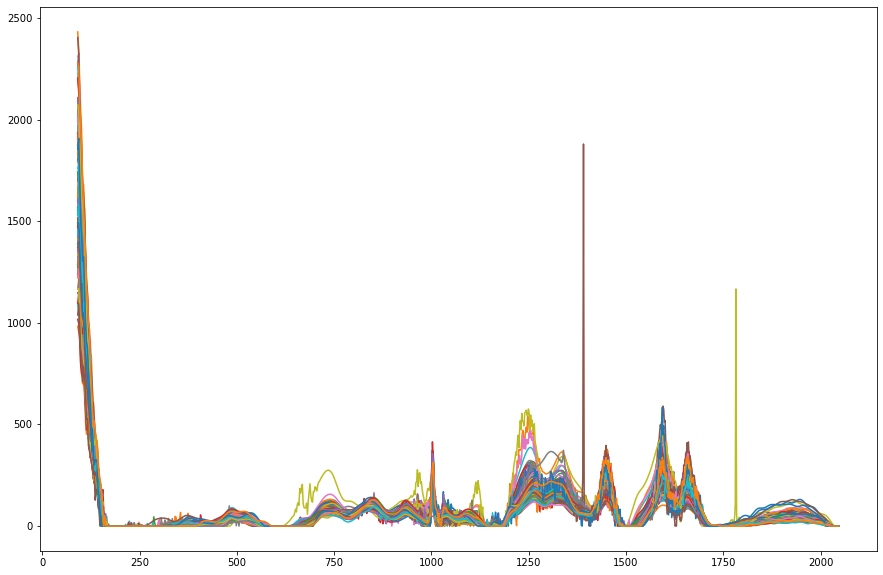

In [11]:
for i in range(0,25*150, 37):
    plt.plot(wavelength, raman_data[0][i])
